In [1]:
import os
from os import path

import sklearn
from sklearn.svm import SVC
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train_dir = '../input/fruit-and-vegetable-image-recognition/train'
valid_dir = '../input/fruit-and-vegetable-image-recognition/validation'
test_dir = '../input/fruit-and-vegetable-image-recognition/test'

In [3]:
total_file=0
for root,dirs,files in os.walk(train_dir):
    for file in files:
        total_file+=1
    print("no of file {} in {}".format(len(files),root))
print("Total files = ",total_file)

no of file 0 in ../input/fruit-and-vegetable-image-recognition/train
no of file 89 in ../input/fruit-and-vegetable-image-recognition/train/capsicum
no of file 91 in ../input/fruit-and-vegetable-image-recognition/train/sweetcorn
no of file 69 in ../input/fruit-and-vegetable-image-recognition/train/orange
no of file 92 in ../input/fruit-and-vegetable-image-recognition/train/tomato
no of file 98 in ../input/fruit-and-vegetable-image-recognition/train/turnip
no of file 68 in ../input/fruit-and-vegetable-image-recognition/train/ginger
no of file 81 in ../input/fruit-and-vegetable-image-recognition/train/raddish
no of file 79 in ../input/fruit-and-vegetable-image-recognition/train/pomegranate
no of file 99 in ../input/fruit-and-vegetable-image-recognition/train/pineapple
no of file 88 in ../input/fruit-and-vegetable-image-recognition/train/jalepeno
no of file 68 in ../input/fruit-and-vegetable-image-recognition/train/apple
no of file 82 in ../input/fruit-and-vegetable-image-recognition/train

In [4]:
def get_file_name(path):
    return os.listdir(path)
class_name=get_file_name(train_dir)
print(class_name)

['capsicum', 'sweetcorn', 'orange', 'tomato', 'turnip', 'ginger', 'raddish', 'pomegranate', 'pineapple', 'jalepeno', 'apple', 'carrot', 'lettuce', 'bell pepper', 'eggplant', 'beetroot', 'kiwi', 'pear', 'cabbage', 'cauliflower', 'paprika', 'lemon', 'sweetpotato', 'grapes', 'cucumber', 'corn', 'banana', 'garlic', 'chilli pepper', 'watermelon', 'mango', 'peas', 'onion', 'potato', 'spinach', 'soy beans']


In [5]:
def transform_dt(directory):
    data=[]
    count=0
    for category in class_name:
        path=os.path.join(directory,category)
        label=class_name.index(category)

        for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            image=cv2.imread(imgpath,0)
            try:
                image=cv2.resize(image,(100,100))
                images=np.array(image).flatten()
                data.append([images,label])
            except Exception as e:
                count+=1
                pass
    return data

In [6]:
train_ds=transform_dt(train_dir)
valid_ds=transform_dt(valid_dir)
test_ds=transform_dt(test_dir)
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

3114
351
359


In [7]:
print(train_ds[1000])
print(train_ds[1000][0])

[array([183, 197, 177, ..., 112, 128, 164], dtype=uint8), 11]
[183 197 177 ... 112 128 164]


10000
image = [[ 87  98  89 ... 142 135 140]
 [ 99 102  97 ... 151 134 145]
 [103  98 106 ... 222 143 152]
 ...
 [231 240 240 ... 234 230 230]
 [230 237 240 ... 232 229 225]
 [222 234 236 ... 229 225 223]]


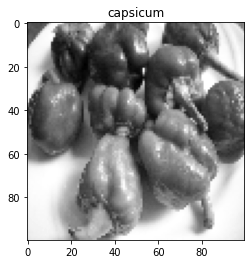

10000
image = [[212 209 211 ... 142 149 155]
 [216 216 218 ... 135 143 147]
 [220 220 222 ... 128 136 144]
 ...
 [180 173 176 ... 150 155 153]
 [197 190 190 ...  76  86  90]
 [202 209 207 ... 122 111 120]]


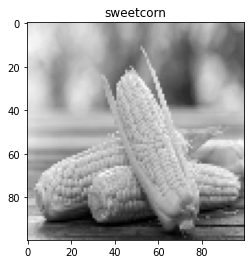

10000
image = [[ 30  32  41 ...   2   2   3]
 [ 37  31  34 ...   2   1   3]
 [ 40  38  33 ...   2   3   2]
 ...
 [ 36  37  39 ...  94  81  13]
 [ 41  49  55 ... 254 189  17]
 [ 57  65  69 ... 248  57  16]]


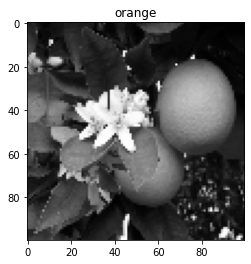

10000
image = [[130 145 136 ...  64  64  64]
 [128 133 133 ...  64  64  64]
 [118 128 120 ...  64  64  64]
 ...
 [ 61  88  85 ...  38  64  74]
 [ 61  71  87 ...  31  64  74]
 [ 60  63  78 ...  31  53  68]]


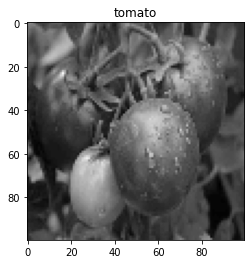

10000
image = [[120 122 130 ... 100  76  73]
 [135 136 137 ... 113  94 101]
 [143 161 145 ... 161 150 150]
 ...
 [ 77  79  74 ...  73  83  76]
 [ 69  80  72 ...  70  82  67]
 [ 79  63  62 ...  82  89  89]]


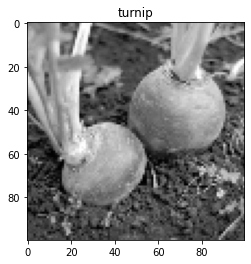

In [8]:
# plt.figure(figsize=(25,20))
for i in range(0,500,100):
    image=train_ds[i][0]
    print(len(image))
    img = image.reshape(100,100)
    print("image =", img)
    plt.imshow(img,cmap='gray')
    plt.title(class_name[train_ds[i][1]])
    plt.show()

In [9]:
train_feature=[]
train_label=[]
for feature, label in train_ds:
    train_feature.append(feature)
    train_label.append(label)
valid_feature=[]
valid_label=[]
for feature, label in valid_ds:
    valid_feature.append(feature)
    valid_label.append(label)
test_feature=[]
test_label=[]
for feature, label in test_ds:
    test_feature.append(feature)
    test_label.append(label)

In [10]:
# from sklearn import preprocessing


In [11]:
# def scaling(data):
#     data=preprocessing.scale(data)
#     return data

In [12]:
# train_feature=scaling(train_feature)
# # train_label=scaling(train_label)
# valid_feature=scaling(valid_feature)
# # valid_label=scaling(valid_label)
# test_feature=scaling(test_feature)
# # test_label=scaling(test_label)
# print(train_label[0])

In [13]:
model= SVC(C=1,kernel='poly',gamma='auto')
model.fit(train_feature,train_label)


accuracy=model.score(valid_feature,valid_label)
print("accuracy = ",accuracy)



accuracy =  0.9601139601139601


[ 0  0  0 13  0  0  0  0  0  0  1  1  1 25  1  1  1  1  1 25  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 19 10 10 33 10 10 10 10 10 13 11 11 11 11 11 11 11 11  8 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 17  3 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26  6 26 26
 26 26 26 26  1 27 27 27 27 27 27 27 27 27 27 28  9 28 28 28 28 28 28 28
 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31
 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32

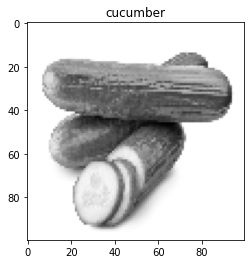

prediction = cucumber
image = [[ 14  17  25 ...  32  85 166]
 [ 41  30  33 ...  32  71 189]
 [ 38  61  36 ...  30  72 180]
 ...
 [171 174 172 ... 123 253 251]
 [134 151 155 ... 253 252 251]
 [ 13  25  22 ... 251 251 251]]


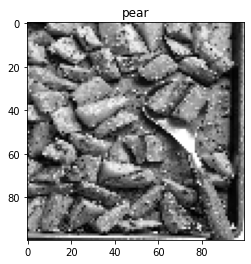

prediction = pear
image = [[120 150 156 ...  24  86 132]
 [107 140 148 ... 102 112 175]
 [105 147 146 ... 134 121 131]
 ...
 [ 46  51  42 ...  27  33  35]
 [ 51  45  45 ...  28  34  36]
 [ 42  50  46 ...  30  33  40]]


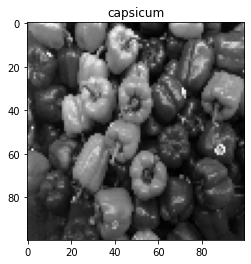

prediction = capsicum
image = [[ 22  18  19 ... 255 255 255]
 [ 25  15  24 ... 250 255 255]
 [ 45  33  17 ... 217 255 255]
 ...
 [ 97  81  85 ... 164 253 255]
 [155  75 126 ... 254 255 255]
 [ 47  78 122 ... 255 255 255]]


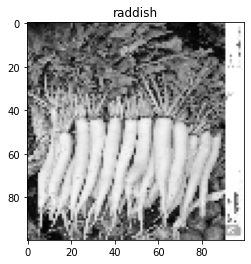

prediction = raddish
image = [[187 181 183 ... 120 146 165]
 [179 178 175 ... 116 149 164]
 [172 172 173 ... 115 151 160]
 ...
 [131 153 169 ... 122 116 107]
 [107 148 165 ... 124 120 110]
 [101 146 162 ... 136 125 112]]


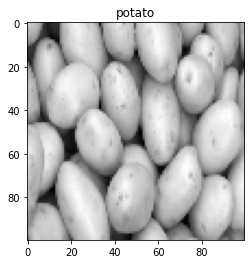

prediction = potato
image = [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


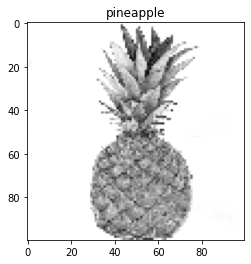

prediction = pineapple
image = [[161 174 142 ...  73 117  84]
 [163 188 124 ... 111  91  39]
 [148 153 142 ...  99 104  56]
 ...
 [ 88  65  70 ... 118 122 128]
 [ 84  61  76 ... 114 113 118]
 [ 70  77  69 ...  77 103 130]]


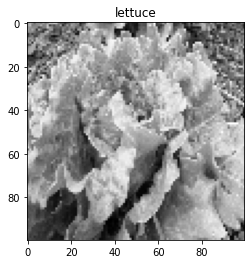

prediction = lettuce
image = [[ 87  86  94 ...  10   3  19]
 [ 93  88  95 ...   8   4   2]
 [ 80  93 101 ...  10  28  57]
 ...
 [ 95  83  87 ... 158 194  75]
 [ 86 101  76 ... 145 171 136]
 [ 76  90 100 ... 111 139 159]]


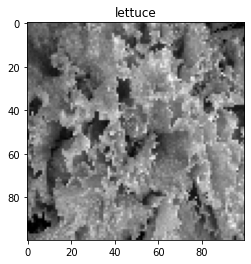

prediction = lettuce
image = [[242 244 243 ... 239 239 239]
 [244 244 244 ... 239 239 239]
 [243 244 244 ... 239 239 239]
 ...
 [178 178 177 ... 182 180 181]
 [166 166 169 ... 177 174 175]
 [163 163 164 ... 171 169 168]]


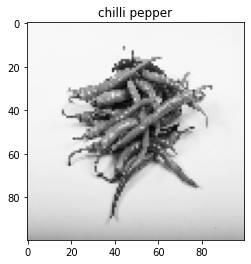

prediction = chilli pepper
image = [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


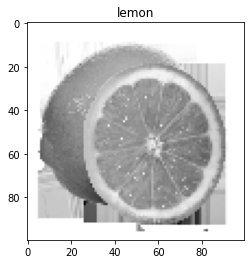

prediction = lemon


In [14]:
import random
prediction=model.predict(test_feature)
print(prediction)
print(len(prediction))
x=0
while x<10:
    i=random.randint(0,359)
    predict_image=test_feature[i]
    img = predict_image.reshape(100,100)
    print("image =", img)
    plt.imshow(img,cmap='gray')
    plt.title(class_name[prediction[i]])
    plt.show()
    print("prediction =",class_name[prediction[i]])
    x+=1

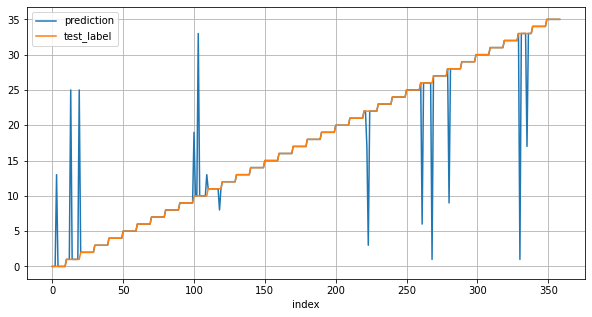

In [15]:
plt.figure(figsize=(10,5))
plt.plot(prediction)
plt.plot(test_label)
plt.grid(True)
plt.legend(['prediction', 'test_label'])
plt.xlabel('index')
plt.show()